In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 2.1.2
print(sns.__version__)  #> 0.8.1

2.2.2
0.8.1


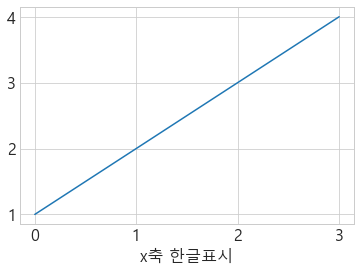

In [21]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import numpy as np

# 폰트 위치 지정
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

plt.plot([1,2,3,4])
plt.xlabel('x축 한글표시')
plt.show()

In [3]:
tr = pd.read_csv("E:/Bigdata/dataset/dacon3/Auction_master_train_utf.csv", parse_dates=["Appraisal_date", "First_auction_date",
                                                         "Final_auction_date","Preserve_regist_date",
                                                        "Close_date"] )
#test = pd.read_csv("data/auction_test.csv", parse_dates=["Appraisal_date", "First_auction_date",
#                                                          "Final_auction_date","Preserve_regist_date",
#                                                         "Close_date"])

print(tr.shape)
tr.head()

(1933, 41)


,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [4]:
tr_sub = tr

In [5]:
sel = ["addr_li","addr_bunji1", "addr_bunji2", "Specific", "road_bunji1", "road_bunji2"]

In [6]:
tr_sub = tr_sub.drop(sel, axis=1)      # sel 컬럼 삭제 

In [7]:
print(  tr_sub.info()  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 35 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null datetime64[ns]
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null datetime64[ns]
Final_auction_date             1933 non-null d

In [9]:
'''
Claim_price                    1933 non-null int64
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
addr_bunji1                    1929 non-null float64
Total_floor                    1933 non-null int64
Current_floor                  1933 non-null int64
road_bunji1                    1909 non-null float64
point.y                        1933 non-null float64
#point.x                        1933 non-null float64
#Hammer_price                   1933 non-null int64
'''
sel_numeric = ['Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Total_floor', 
        'Current_floor', 'point.y', 'point.x', 'Hammer_price' ]
sel_numeric_part = ['Auction_count',
       'Total_land_auction_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Hammer_price' ]

In [10]:
print(tr_sub.columns)
tr_sub.head()
tr_sub_num = tr_sub[sel_numeric]
#test_sub_num = test_sub[sel_numeric]
tr_sub_num_p = tr_sub[sel_numeric_part]
#test_sub_num_p = test_sub[sel_numeric_part]

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_san', 'addr_etc', 'Apartment_usage',
       'Preserve_regist_date', 'Total_floor', 'Current_floor',
       'Share_auction_YorN', 'road_name', 'Close_date', 'Close_result',
       'point.y', 'point.x', 'Hammer_price'],
      dtype='object')


In [11]:
df = tr_sub

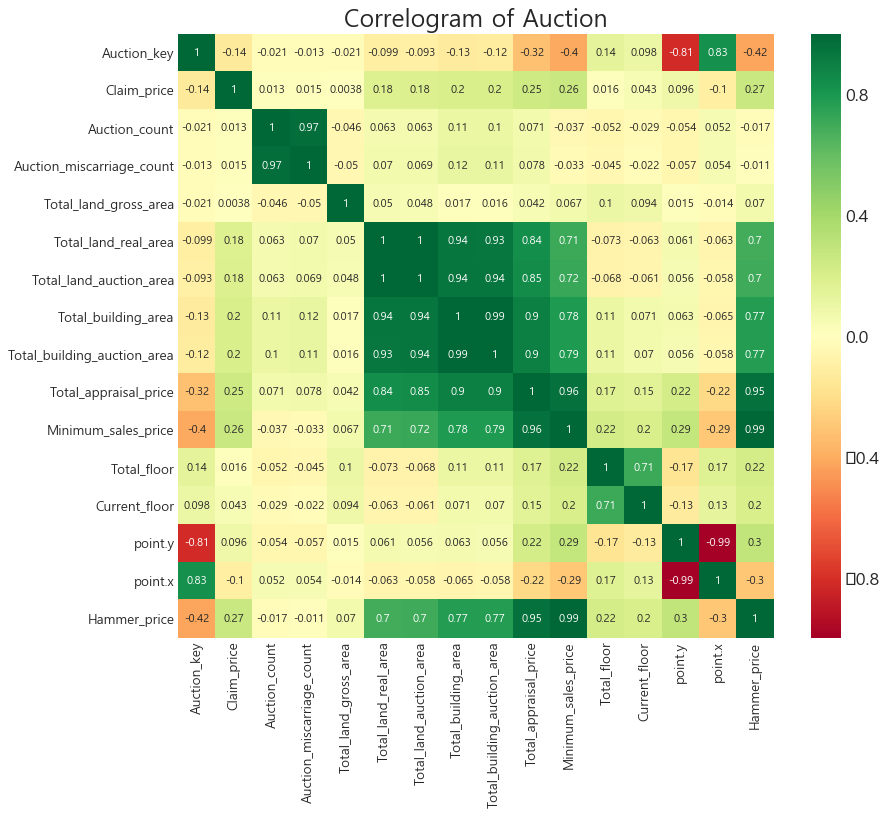

In [12]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns, 
            yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Auction', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 1. 도로명별 Minimum_sales_price 분포 확인하기
: 위치에 따른 최저 매각 가격의 차이 확인을 위해 road_name vs Minimum_sales_price 그래프를 그려보고자 함.

In [14]:
# plt.show()를 생략해 주는 주피터 명령
%matplotlib inline 

In [15]:
sns.set_style('whitegrid')

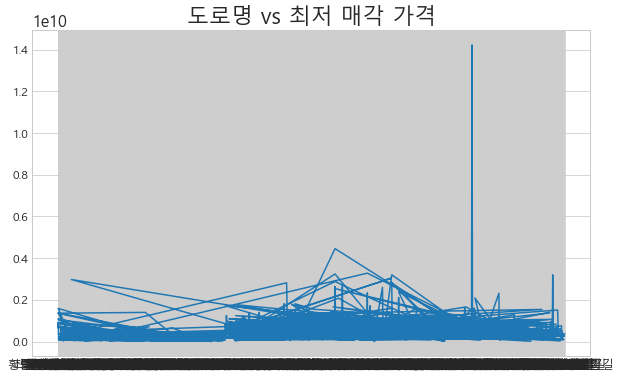

In [23]:
x=tr_sub['road_name']
y=tr_sub['Minimum_sales_price']
fig=plt.figure(figsize=(10,6))
plt.plot(x,y)

# Decorations
plt.title('도로명 vs 최저 매각 가격', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 2. Total_building_auction_area vs Minimum_sales_price 분포 확인하기
: 평수에 따른 최저 매각 가격의 차이 확인을 위해 그래프를 그려보고자 함.

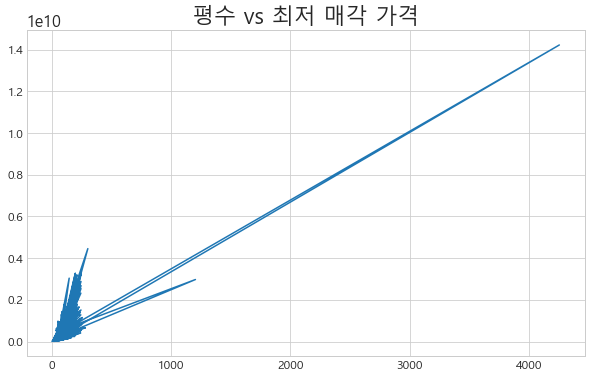

In [22]:
x=tr_sub['Total_building_auction_area']
y=tr_sub['Minimum_sales_price']
fig=plt.figure(figsize=(10,6))
plt.plot(x,y)

# Decorations
plt.title('평수 vs 최저 매각 가격', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 3. Auction_count vs Minimum_sales_price 분포 확인하기
: 경매횟수에 따른 최저 매각 가격의 차이 확인을 위해 그래프를 그려보고자 함.

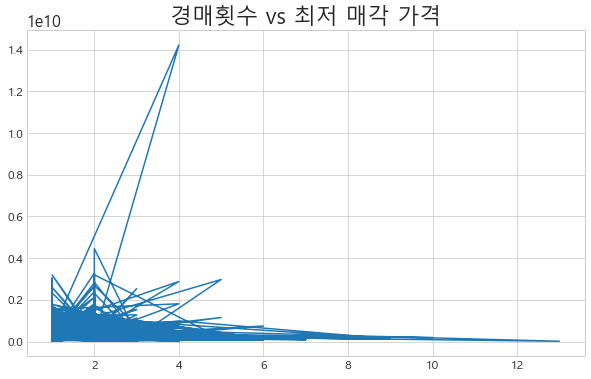

In [24]:
x=tr_sub['Auction_count']
y=tr_sub['Minimum_sales_price']
fig=plt.figure(figsize=(10,6))
plt.plot(x,y)

# Decorations
plt.title('경매횟수 vs 최저 매각 가격', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 3-2. Auction_count vs Minimum_sales_price 분포 확인하기 (boxplot)
: 경매횟수에 따른 최저 매각 가격의 차이 확인을 위해 그래프를 그려보고자 함.

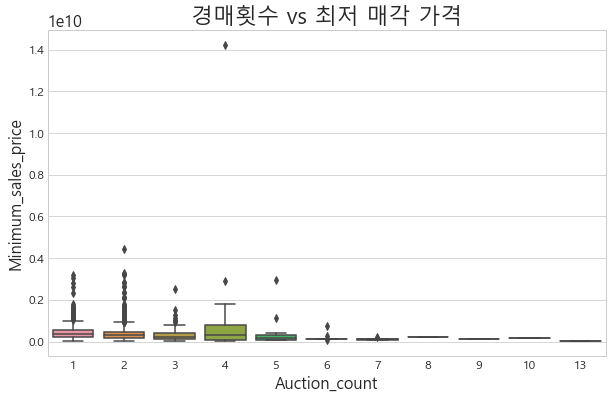

In [29]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(x='Auction_count', y='Minimum_sales_price', data=tr_sub)

# Decorations
plt.title('경매횟수 vs 최저 매각 가격', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()